In [1]:
import qiskit

In [2]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService

In [3]:
from qiskit import QuantumCircuit

In [4]:
import math

In [5]:
service = QiskitRuntimeService()

In [24]:
def half_adder(qc,first_qbit):

    #mesuare all qbits 0, 1 and 2
    qc.measure(first_qbit,0)
    qc.measure(first_qbit+1,1)
    qc.measure(first_qbit+2,2)

    #apply CNOT on qbits 1 and 2 with qbit 3 as control
    qc.cx(first_qbit+1,first_qbit+3)
    qc.cx(first_qbit+2,first_qbit+3)

    #apply CNOT on qbits 0 and 3 with qbit 4 as control
    qc.cx(first_qbit,first_qbit+4)
    qc.cx(first_qbit+3,first_qbit+4)

    #mesuare qbit 4 with contain the result of the sum of the qbits 0, 1 and 2
    qc.measure(first_qbit+4,3)

In [25]:
def carry_out(qc,first_qbit):
    #apply CCNOT on qbits 1 and 2 with qbit 5 as control
    qc.ccx(first_qbit+1,first_qbit+2,first_qbit+5)
    #apply CCNOT on qbits 0 and 3 with qbit 6 as control
    qc.ccx(first_qbit,first_qbit+3,first_qbit+6)

    #invert qbits 5 and 6
    qc.x(first_qbit+5)
    qc.x(first_qbit+6)

    #apply CcNOT on qbits 5 and 6 with qbit 7 as control
    qc.ccx(first_qbit+5,first_qbit+6,first_qbit+7)

    #reversible inversion of qbit 7
    qc.rx(math.pi,first_qbit+7)

    #measure qbit 7 with contain the carry out of the sum of the qbits 0, 1 and 2
    qc.measure(first_qbit+7,4)

In [28]:
def block_full_adder(value1,value2,carry_in,first_qbit):
    if value1 == 1:
        qc.x(first_qbit)
    if value2 == 1:
        qc.x(first_qbit+1)
    if carry_in == 1:
        qc.x(first_qbit+2)
    half_adder(qc,first_qbit)
    carry_out(qc,first_qbit)

In [35]:
#create quantum circuit with 7 qbits and 4 classical bits
qc = QuantumCircuit(16,10)

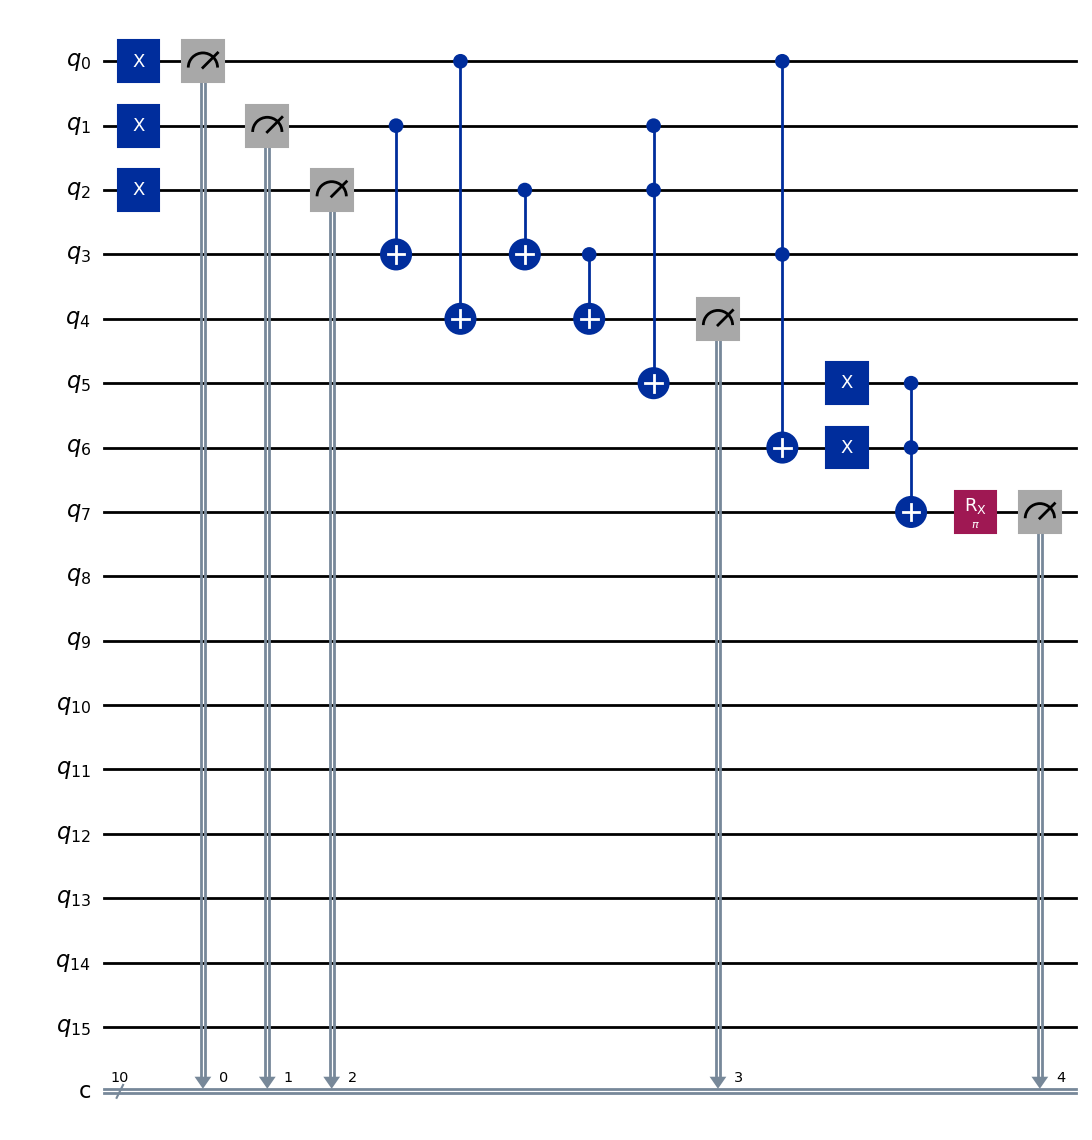

In [36]:
block_full_adder(1,1,1,0)
#block_full_adder(1,1,1,8)
qc.draw(output='mpl',style='iqp')

In [20]:
#without noise
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
#isa_observable = observable.apply_layout(isa_qc.layout)
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()

In [21]:
#with noise
real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
 
# Run the sampler job locally using AerSimulator.
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)
isa_qc = pm.run(qc)
sampler = Sampler(mode=aer)
noiseresult = sampler.run([isa_qc]).result()

KeyboardInterrupt: 

In [ ]:
qc.cregs

[ClassicalRegister(5, 'c')]

In [ ]:
noiseresult[0].data.c.get_counts(), result[0].data.c.get_counts()

({'11111': 847,
  '01111': 83,
  '10111': 68,
  '00111': 4,
  '11110': 10,
  '11011': 5,
  '11101': 3,
  '01011': 1,
  '10011': 1,
  '10110': 2},
 {'11111': 1024})